<a href="https://colab.research.google.com/github/CinthiaNagahama/DIO_Cognizant-Cloud-Data-Engineer_Bootcamp/blob/main/Python%2BPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto 1**
### Análise de Dados com Python e Pandas

In [ ]:
# Monta o drive no ambiente virtual permitindo acesso aos arquivos do drive
from google.colab import drive
drive.mount('/content/drive')

# Permite escolher um arquivo da máquina para upload no colab
from google.colab import files
arq = files.upload()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Teoria

### Lendo arquivos

In [2]:
# Lendo CSV
df = pd.read_csv("/content/drive/MyDrive/Cognizant Bootcamp 2021/Projeto - Python + Pandas/datasets/Gapminder.csv", error_bad_lines = False, sep = ";")

# Lendo Planilha Excel
df1 = pd.read_excel("/content/drive/MyDrive/Cognizant Bootcamp 2021/Projeto - Python + Pandas/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/Cognizant Bootcamp 2021/Projeto - Python + Pandas/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/Cognizant Bootcamp 2021/Projeto - Python + Pandas/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/Cognizant Bootcamp 2021/Projeto - Python + Pandas/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/Cognizant Bootcamp 2021/Projeto - Python + Pandas/datasets/Salvador.xlsx")

KeyboardInterrupt: ignored

In [ ]:
df.dtypes

In [ ]:
df_lojas = pd.concat([df1, df2, df3, df4, df5])
df_lojas.dtypes

### Tratando Valores Faltantes

Verifique se alguma linha possui valor faltante, se existir alguma linha, trate o dataframe para evitar que essas linhas gerem erros e/ou inconsistências

In [3]:
print("Gapminder: \n")
print(df.isnull().sum())

print("\nLojas: \n")
print(df_lojas.isnull().sum())

Gapminder: 

country        0
continent    301
year           0
lifeExp        0
pop            0
gdpPercap      0
dtype: int64

Lojas: 



NameError: ignored

#### Métodos de Tratamento:
- Apagar as linhas com valores nulos

In [ ]:
# Qualquer linha
df.dropna(inplace = True)

# Apagando linha com valor nulo em uma coluna específica
df.dropna(subset = ["continent"], inplace = True)

# Apagando linha com valores faltantes em todas as colunas
df.dropna(how = "all", inplace = True)


- Substituir os valores nulos pela média

In [ ]:
df_lojas["Vendas"].fillna(df_lojas["Vendas"].mean(), inplace = True)

- Substituir os valores nulos por 0

In [ ]:
df_lojas["Vendas"].fillna(0, inplace = True)

### Criando Novas Colunas

Às vezes, a coluna que você precisa não existe, porém os dados para gerá-la existem

In [ ]:
df_lojas["Receita"] = df_lojas["Vendas"].mul(df_lojas["Qtde"])

print(df_lojas.head())

df_lojas.groupby("LojaID")["Receita"].sum()

### Trabalhando com datas

Se a coluna de datas não estiver no formato de data (datetime), é possível convertê-la com a função to_datetime do pandas

In [ ]:
df_lojas["Data"] = df_lojas["Data"].astype("int64")

df_lojas.dtypes

In [ ]:
df_lojas["Data"] = pd.to_datetime(df_lojas["Data"])

df_lojas.dtypes

Quando a coluna está no formato datetime, vários agrupamentos podem ser feitos utilizando apenas o ano, o mês, o dia etc

In [ ]:
# Agrupamento da soma total de receita por ano
df_lojas.groupby(df_lojas["Data"].dt.year)["Receita"].sum()

In [ ]:
# Intervalo de tempo entre a data atual e a primeira medição
df_lojas["Data"] - df_lojas["Data"].min()

In [ ]:
# Filtrando as vendas de março de 2019
vendas_marco_2019 = df_lojas.loc[(df_lojas["Data"].dt.year == 2019) & (df_lojas["Data"].dt.month == 3)]

vendas_marco_2019

### Visualização de Dados

In [ ]:
df_lojas["LojaID"].value_counts(ascending = False).plot.bar()
plt.xlabel("Loja ID")
plt.ylabel("Vendas")

In [ ]:
plt.style.use("ggplot")
df_lojas["LojaID"].value_counts().plot.barh(title = "Vendas por Loja", color = "green")

## Análise Exploratória

In [4]:
plt.style.use("seaborn")

df = pd.read_excel("/content/drive/MyDrive/Cognizant Bootcamp 2021/Projeto - Python + Pandas/datasets/AdventureWorks.xlsx")

In [5]:
print(df.shape)
print("\n\n")

print(df.dtypes)
print("\n\n")

print(df.isnull().sum())
print("\n\n")

df.head(1)

(904, 16)



Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object



Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
dtype: int64





,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [6]:
# Qual é a receita total?
print("Receita total de vendas: {}".format(df["Valor Venda"].sum()))

Receita total de vendas: 5984606.1426


In [7]:
# Qual o ganho por venda?
df["Lucro"] = df["Valor Venda"].sub(df["Custo Unitário"].mul(df["Quantidade"]))

df.sample(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Lucro
488,2008-12-05,2008-12-12,199,1155,18893,200812054CS800,324.69,980.00,18,3528.000,14112.000,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,8267.580
757,2008-08-22,2008-08-30,199,2497,18864,200808225CS677,5.09,9.99,288,287.712,2589.408,Headphone Adapter for Contoso Phone E130 White,"Contoso, Ltd",Contoso,Economy,White,1123.488
384,2009-07-11,2009-07-19,199,1203,18964,200907114CS875,324.69,980.00,7,686.000,6174.000,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,3901.170
394,2009-12-28,2010-01-06,307,1203,19145,200912284CS735,324.69,980.00,9,1323.000,7497.000,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,4574.790
894,2008-12-17,2008-12-22,307,1226,19111,200812174CS669,330.99,999.00,6,899.100,5094.900,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,3108.960


In [8]:
# Qual o tempo médio de envio para cada marca?

df["Tempo de Envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

df.groupby("Marca")["Tempo de Envio"].mean().reset_index()

,Marca,Tempo de Envio
0,Adventure Works,8.663866
1,Contoso,8.470930
2,Fabrikam,8.510121


In [11]:
# Qual o lucro por ano e marca?
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum().reset_index()

pd.options.display.float_format = "{:20,.2f}".format
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


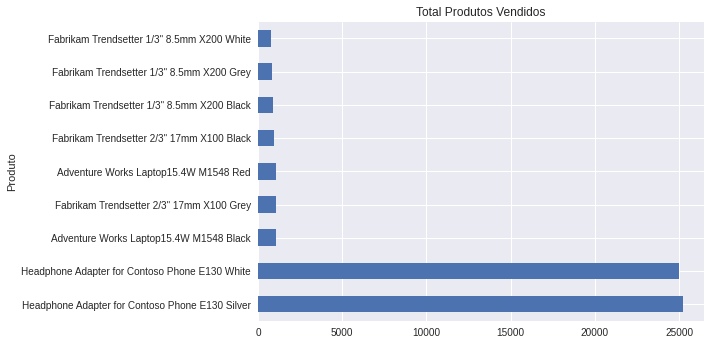

In [13]:
# Qual o total de produtos vendidos?
total = df.groupby("Produto")["Quantidade"].sum().sort_values(ascending = False)

total.plot.barh(title = "Total Produtos Vendidos")

In [16]:
df.describe()

,ID Loja,ID Produto,ID Cliente,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Lucro,Tempo de Envio
count,904.00,904.00,904.00,904.00,904.00,904.00,904.00,904.00,904.00,904.00
mean,270.02,"1,225.24","19,029.09",272.01,742.53,62.95,689.12,"6,620.14","3,869.27",8.54
std,50.96,706.70,96.43,129.77,368.59,148.95,822.36,"4,319.41","2,823.81",3.06
min,199.00,366.00,"18,815.00",5.09,9.99,2.00,0.00,159.84,78.40,4.00
25%,199.00,384.00,"18,964.75",324.69,758.00,6.00,0.00,"3,920.00","2,001.72",6.00
50%,306.00,"1,202.00","19,060.00",330.66,980.00,9.00,461.17,"5,798.70","3,405.24",9.00
75%,307.00,"1,226.00","19,107.00",348.58,998.00,17.00,"1,005.08","7,986.00","4,670.68",11.00
max,307.00,"2,497.00","19,145.00",348.58,999.00,"1,560.00","6,272.00","29,400.00","19,659.30",20.00
